In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge


# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [144]:
dfsheet=pd.read_excel('customer_retention_dataset.xlsx')
dfsheet

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [145]:
dfsheet.shape

(269, 71)

In [146]:
dfsheet.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [147]:
dfsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [196]:
dfcoded=pd.read_excel('customer_retention_datasetcoded.xlsx')
dfcoded

1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
..                     ...                  ...   
264                      1                    2   
265                      1                    3   
266                      1                    4   
267                      1                    1   
268                      1                    4   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

     5 Since How Long You are Shopping Online ?  \
0                                             5   
1                                             5   
2                                             4   
3                                             4   
4                                             3   
..                                          ...   
264                                           2   
265                                           2   
266                                           3   
267                                           3   
268                                           3   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    4                       
1                                                    5                       
2                                                    5                       
3                                                    1                       
4                                                    2                       
..                                                 ...                       
264                                                  1                       
265                                                  4                       
266                                                  1                       
267                                                  1                       
268                                                  4                       

     7 How do you access the internet while shopping on-line?  \
0                                                    4          
1                                                    2          
2                                                    3          
3                                                    3          
4                                                    2          
..                                                 ...          
264                                                  3          
265                                 

In [7]:
#Lets check the object type columns
#their value counts and uniques values

for col in dfsheet.columns:
    if dfsheet[col].dtype=="object":
        print(dfsheet[col].value_counts())
        print()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

Mobile internet    142
Wi-Fi               76
Mobile Inter

Name: Wild variety of product on offer, dtype: int64

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64

Amazon.in                                                       51
Amazon.in, Paytm.com                                   

In [8]:
dfsheet.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [9]:
dfsheet.describe(include=[object])

1Gender of respondent 2 How old are you?   \
count                    269                 269   
unique                     2                   5   
top                   Female         31-40 years   
freq                     181                  81   

       3 Which city do you shop online from?  \
count                                    269   
unique                                    11   
top                                    Delhi   
freq                                      58   

       5 Since How Long You are Shopping Online ?  \
count                                         269   
unique                                          5   
top                                 Above 4 years   
freq                                           98   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                                 269                      
unique                                                  6                      
top                                    Less than 10 times                      
freq                                                  114                      

       7 How do you access the internet while shopping on-line?  \
count                                                 269         
unique                                                  4         
top                                       Mobile internet         
freq                                                  142         

       8 Which device do you use to access the online shopping?  \
count                                                 269         
unique                                                  4         
top                                            Smartphone         
freq                                                  141         

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                                 269                                                     
unique                                                  4                                                     
top                                                Others                                                     
freq                                                  134                                                     

       10 What is the operating system (OS) of your device?\t\t\t\t                                            \
count                                                 269                                                       
unique                                                  3                                                       
top                                 Window/windows Mobile                                                       
freq                                                  122                                                       

       11 What browser do you run on your device to access the website?\t\t\t                                                            \
count                                                 269                                                                                 
unique                                                  4                                                                                 
top                                         Google chrome                                                                                 
freq                                                  216                                                                                 

       12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
count                                                 269                                                                                                               
unique    

In [10]:
dfsheet.describe()

4 What is the Pin Code of where you shop online from?
count                                         269.000000    
mean                                       220465.747212    
std                                        140524.341051    
min                                        110008.000000    
25%                                        122018.000000    
50%                                        201303.000000    
75%                                        201310.000000    
max                                        560037.000000

In [11]:
dfcoded.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            4.282528                                                      
std                                             0.923426                                                      
min                                             2.000000                                             

In [12]:
CategoricData=dfsheet.select_dtypes(include=['object','category'])
rows,col=(CategoricData.shape)
print("Number of Categorical columns are:",col)
print(CategoricData.columns)

Number of Categorical columns are: 70
Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online re

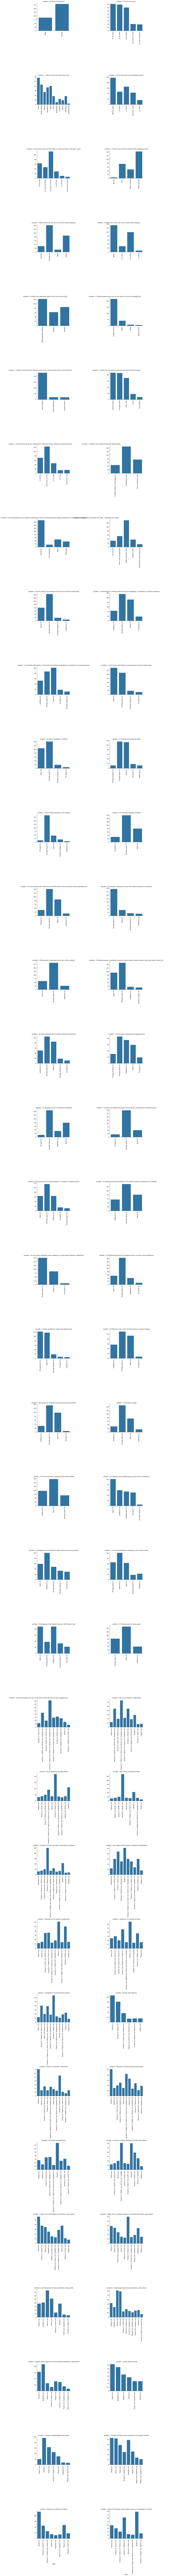

In [19]:
#melting the dataframe to bring the data into single column
ConvertedCatDataMelt=CategoricData.melt()
#size = (20, 50)

#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=8,col_wrap=2)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
#plt.figure(figsize=(5,5))
plt.tight_layout()


In [ ]:
#most of the online shopping users are -female,
#most of them are between the age 31 to 50 so the i think people with jobs/earning money are the customers rather than younger age students
#most customer shops from delhi city
#Most  online customer only shops less than 10
#most customers prefers paying using credit/debit cards.
#Mowst peoples strongly agrees that the content of the website must be easy to understand and  have a ease of navigation in websites
#loading and processng speed should be faster
#

In [14]:
CategoricData.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                   

In [24]:
CategoricalConData=dfsheet[['6 How many times you have made an online purchase in the past 1 year?','8 Which device do you use to access the online shopping?','14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ','15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ','16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ','17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ','21 All relevant information on listed products must be stated clearly','22 Ease of navigation in website','27 Empathy (readiness to assist with queries) towards the customers','30 Online shopping gives monetary benefit and discounts','31 Enjoyment is derived from shopping online',
'34 Gaining access to loyalty programs is a benefit of shopping online','37 Net Benefit derived from shopping online can lead to users satisfaction','38 User satisfaction cannot exist without trust','45 You feel gratification shopping on your favorite e-tailer','Website is as efficient as before','Which of the Indian online retailer would you recommend to a friend?']].copy()

Text(0.5, 1.0, 'Website is as efficient as before')

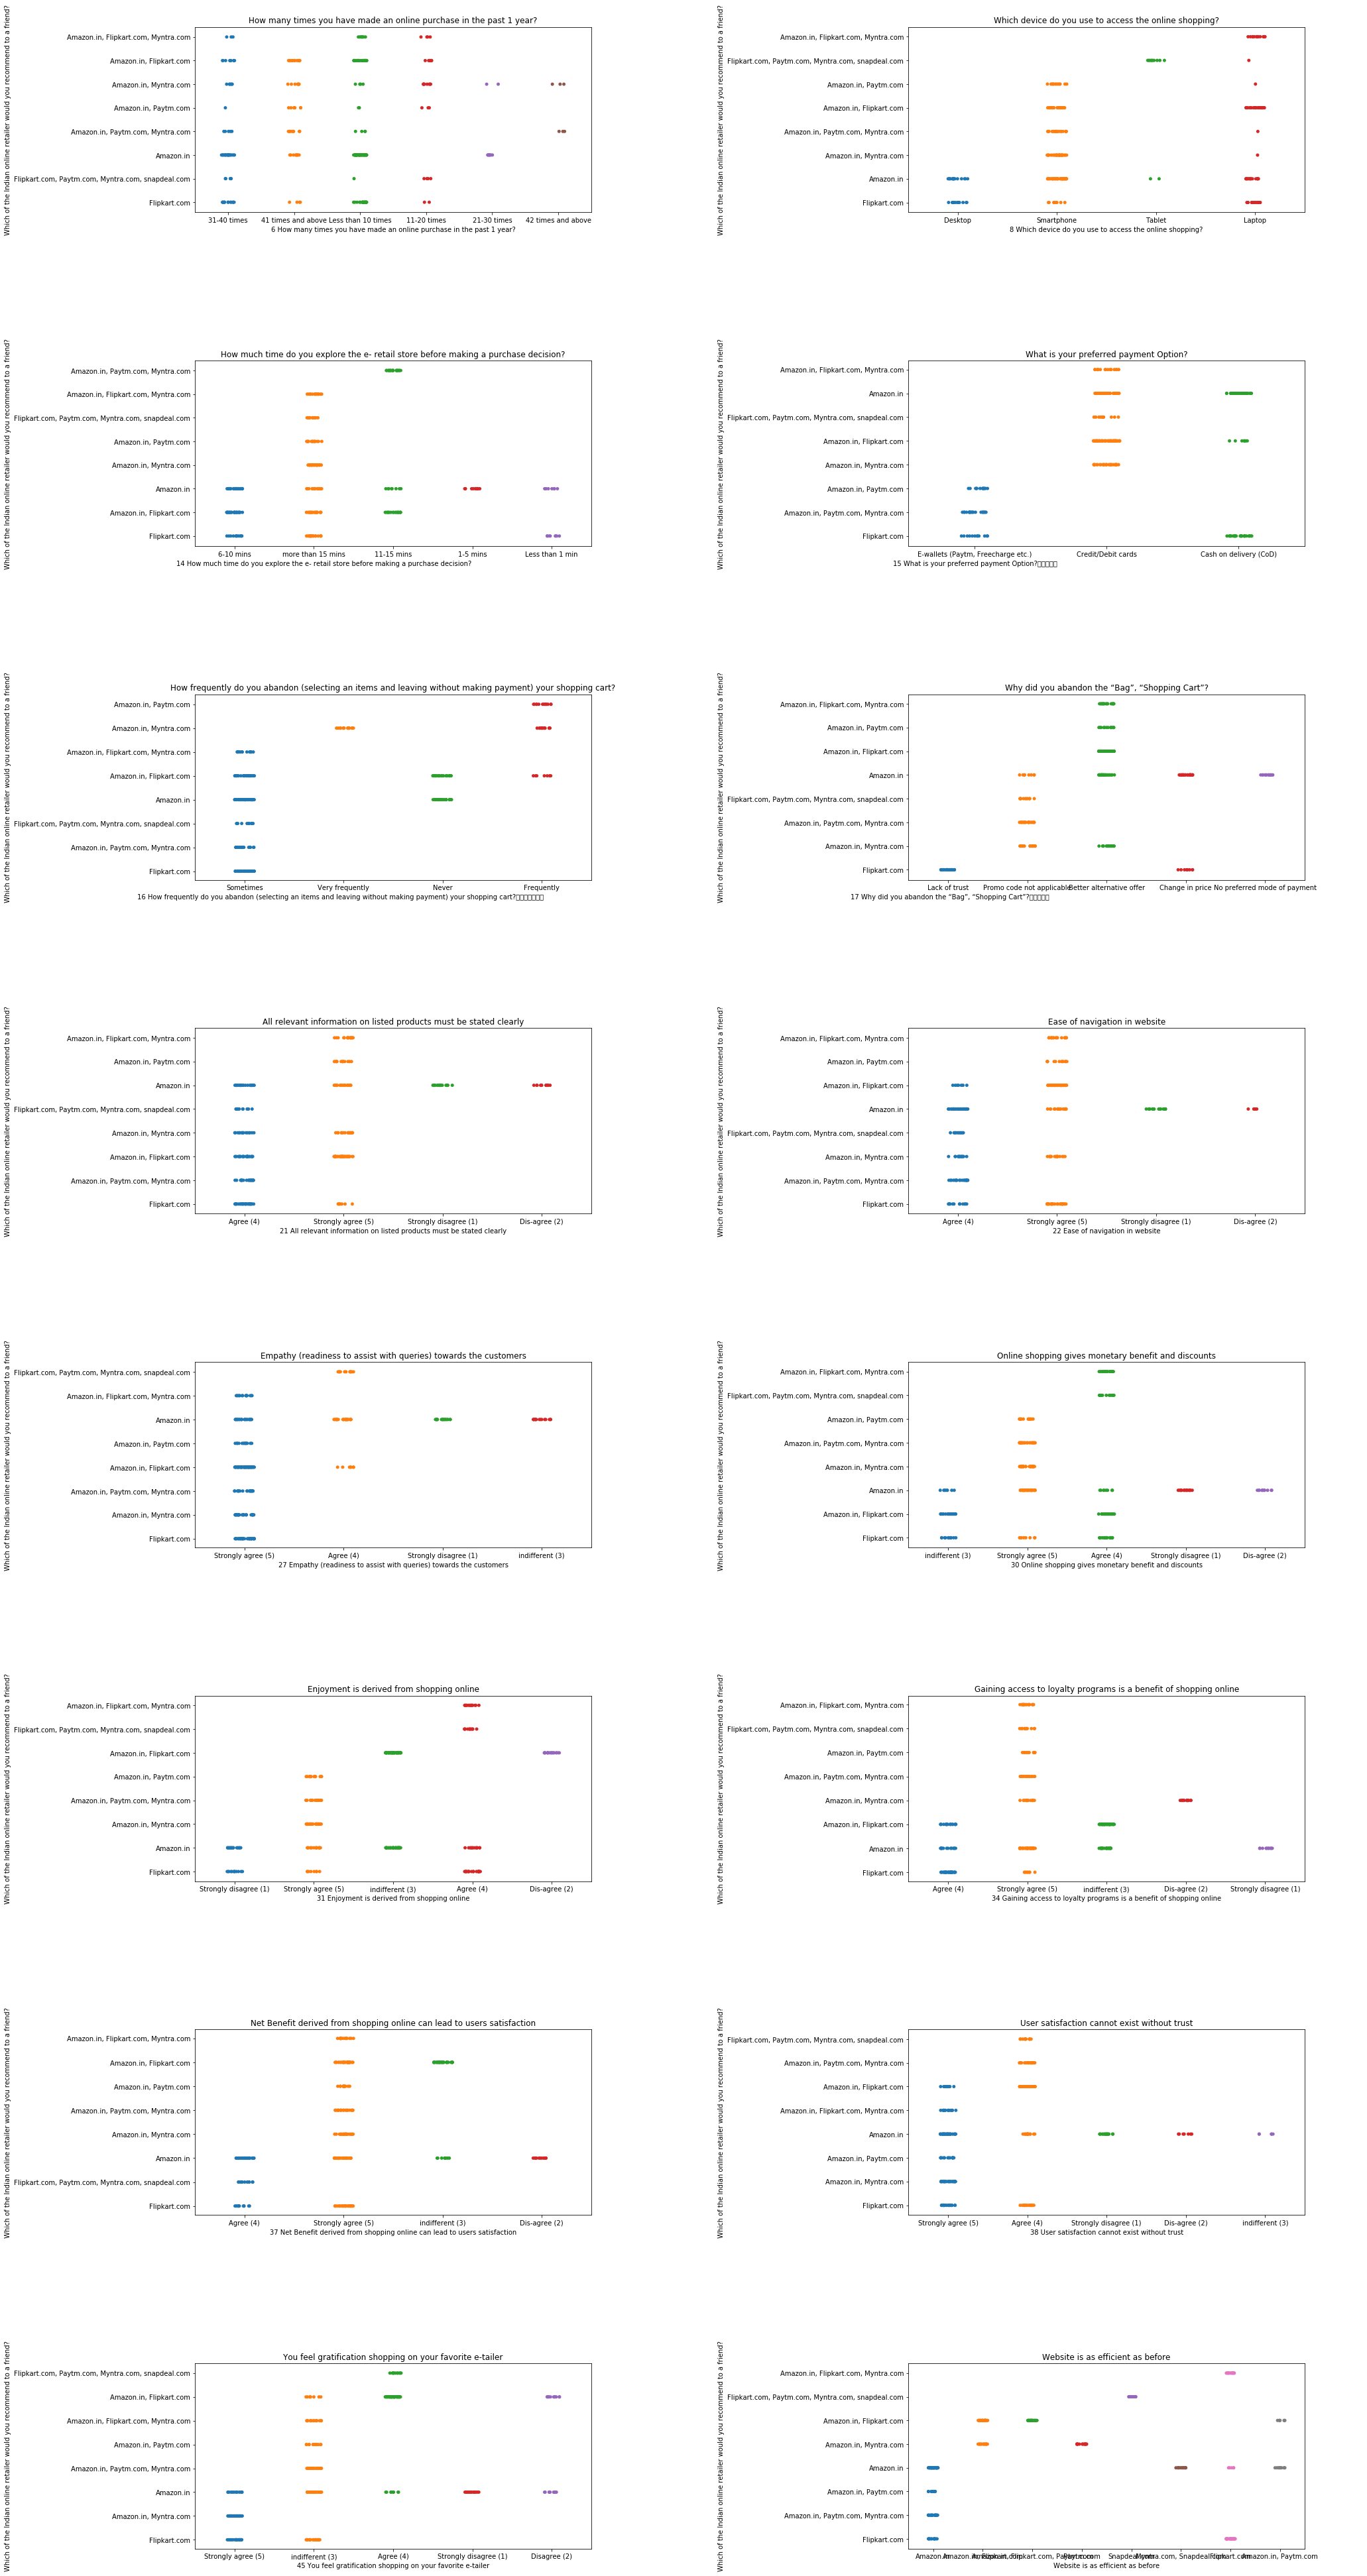

In [44]:
size = (30,70)
CategoricalConData['Which of the Indian online retailer would you recommend to a friend?']=dfsheet['Which of the Indian online retailer would you recommend to a friend?']

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .8, wspace=.8)

sns.stripplot(x=CategoricalConData['6 How many times you have made an online purchase in the past 1 year?'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[0][0], ).set_title("How many times you have made an online purchase in the past 1 year?")
sns.stripplot(x=CategoricalConData['8 Which device do you use to access the online shopping?'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[0][1] ).set_title("Which device do you use to access the online shopping?")

sns.stripplot(x=CategoricalConData['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[1][0], ).set_title("How much time do you explore the e- retail store before making a purchase decision?")
sns.stripplot(x=CategoricalConData['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[1][1] ).set_title("What is your preferred payment Option?")

sns.stripplot(x=CategoricalConData['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[2][0], ).set_title("How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?")
sns.stripplot(x=CategoricalConData['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[2][1] ).set_title("Why did you abandon the “Bag”, “Shopping Cart”?")

sns.stripplot(x=CategoricalConData['21 All relevant information on listed products must be stated clearly'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[3][0], ).set_title("All relevant information on listed products must be stated clearly")
sns.stripplot(x=CategoricalConData['22 Ease of navigation in website'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[3][1] ).set_title("Ease of navigation in website")

sns.stripplot(x=CategoricalConData['27 Empathy (readiness to assist with queries) towards the customers'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[4][0], ).set_title("Empathy (readiness to assist with queries) towards the customers")
sns.stripplot(x=CategoricalConData['30 Online shopping gives monetary benefit and discounts'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[4][1] ).set_title("Online shopping gives monetary benefit and discounts")

sns.stripplot(x=CategoricalConData['31 Enjoyment is derived from shopping online'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[5][0], ).set_title("Enjoyment is derived from shopping online")
sns.stripplot(x=CategoricalConData['34 Gaining access to loyalty programs is a benefit of shopping online'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[5][1] ).set_title("Gaining access to loyalty programs is a benefit of shopping online")

sns.stripplot(x=CategoricalConData['37 Net Benefit derived from shopping online can lead to users satisfaction'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[6][0], ).set_title("Net Benefit derived from shopping online can lead to users satisfaction")
sns.stripplot(x=CategoricalConData['38 User satisfaction cannot exist without trust'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[6][1] ).set_title("User satisfaction cannot exist without trust")

sns.stripplot(x=CategoricalConData['45 You feel gratification shopping on your favorite e-tailer'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[7][0], ).set_title("You feel gratification shopping on your favorite e-tailer")
sns.stripplot(x=CategoricalConData['Website is as efficient as before'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[7][1] ).set_title("Website is as efficient as before")

Text(0.5, 1.0, 'Website is as efficient as before')

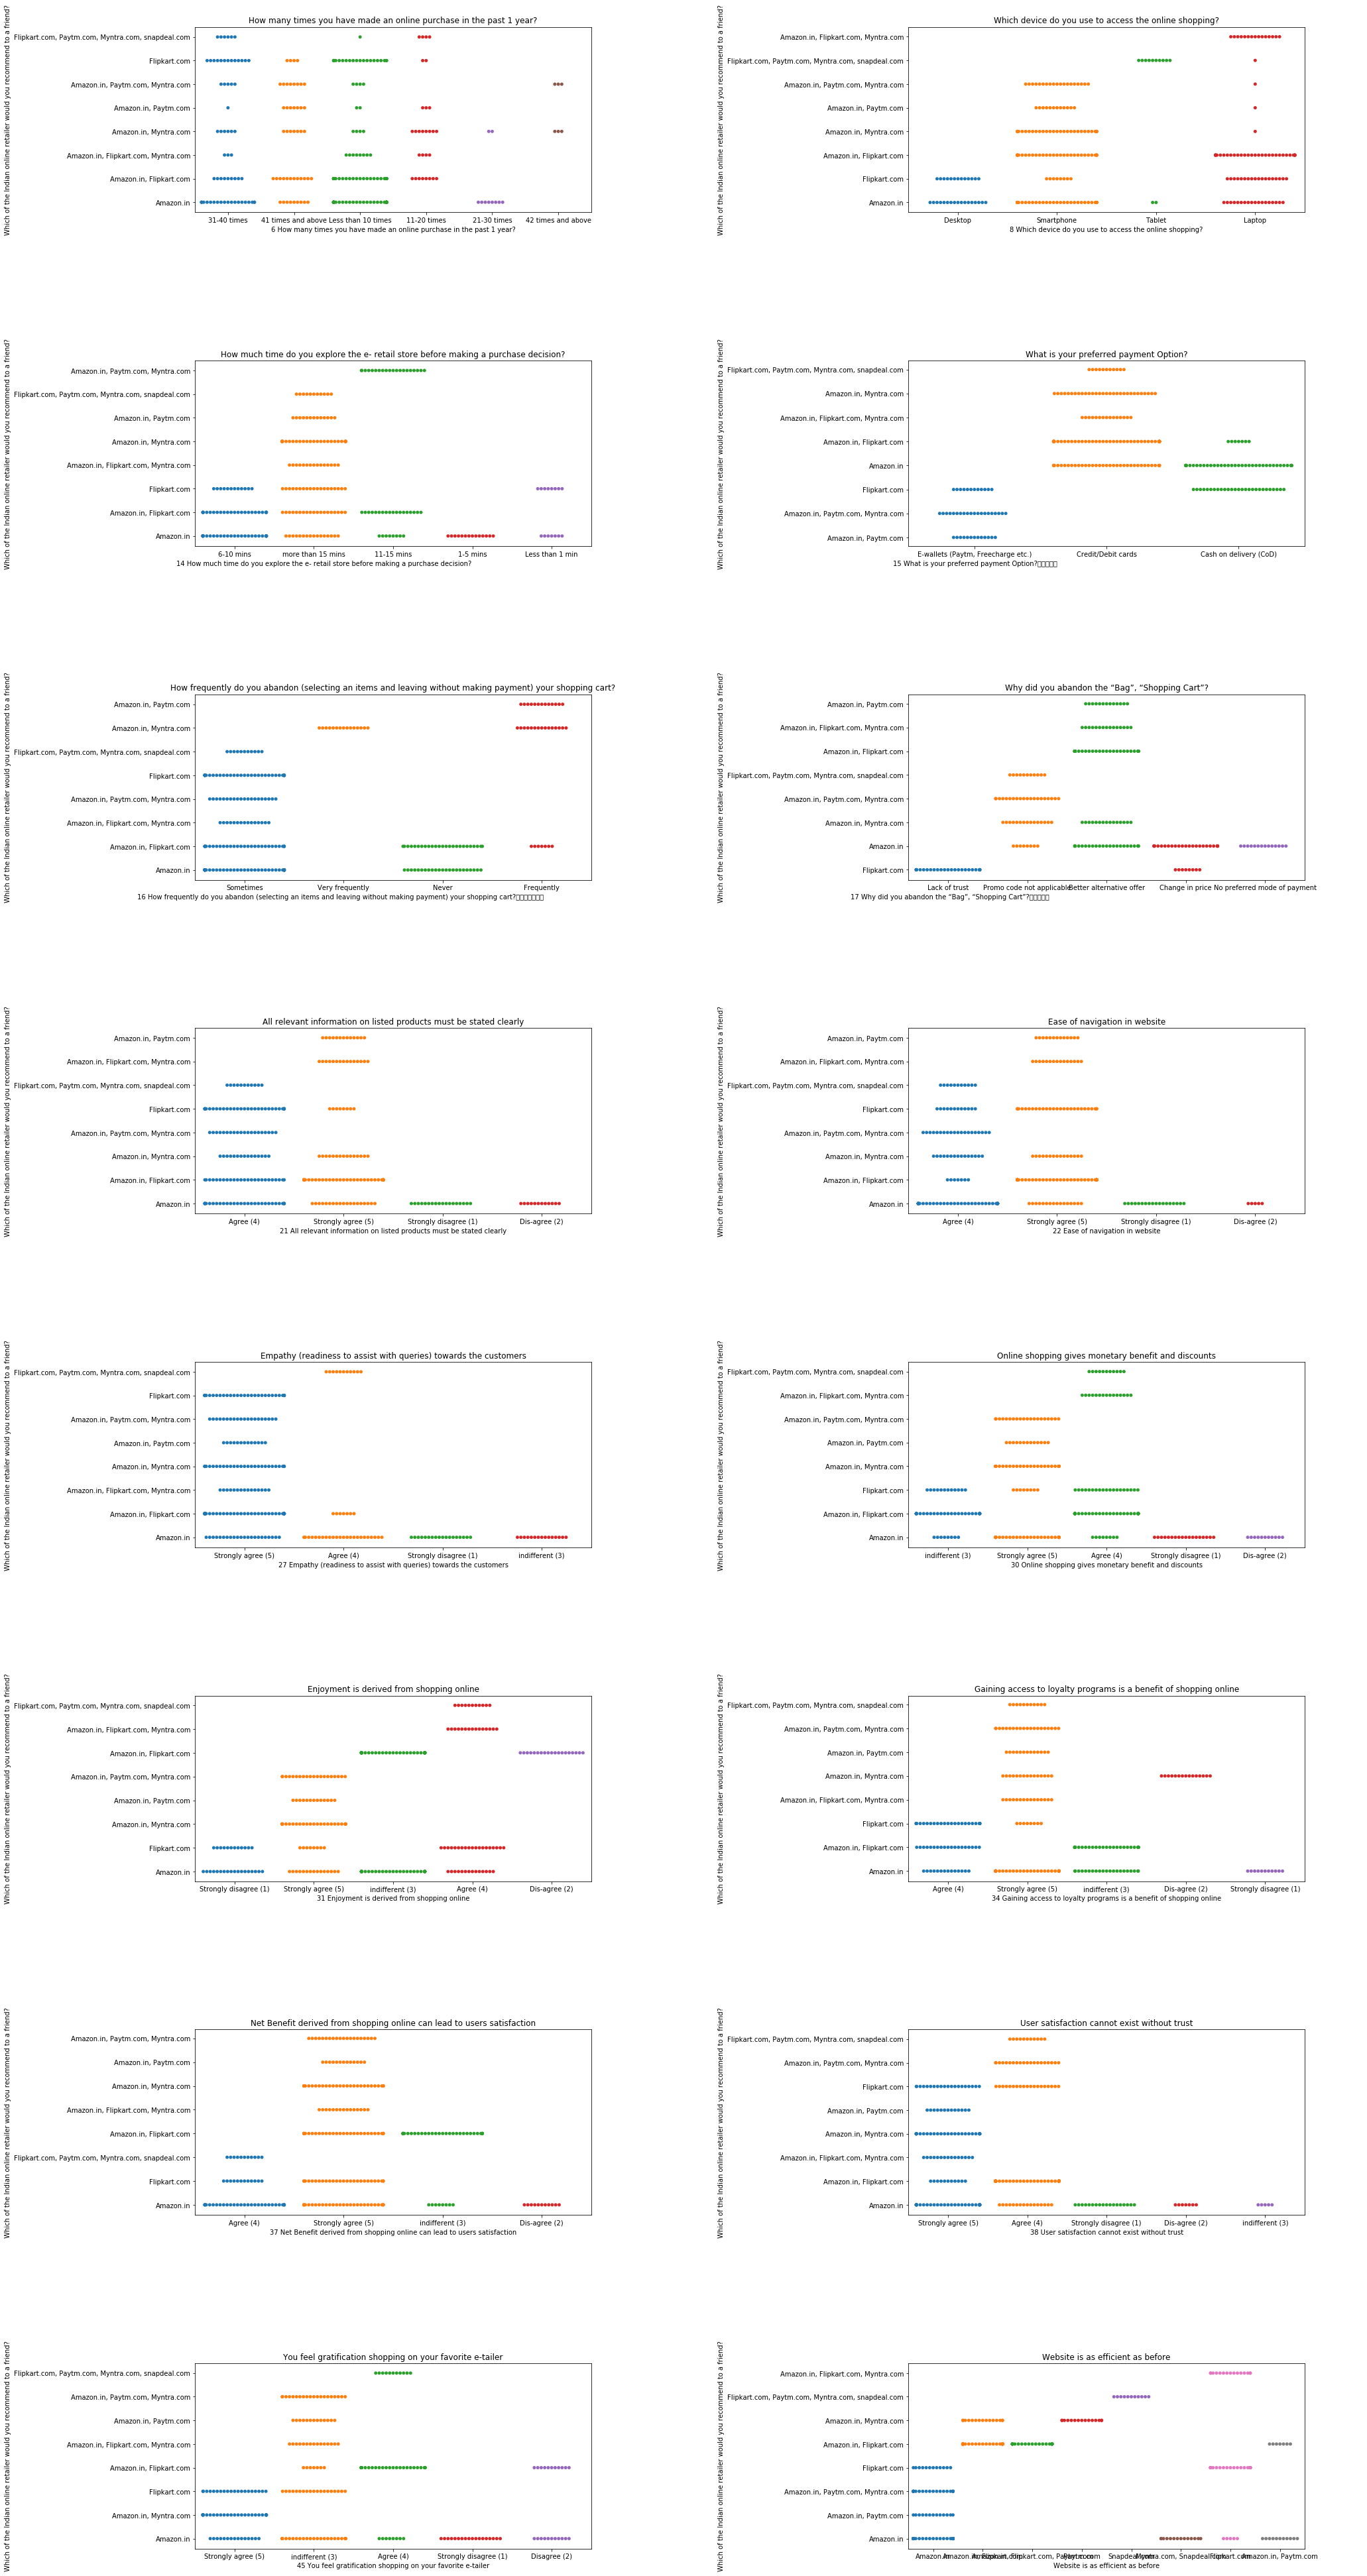

In [49]:
size = (30,70)
CategoricalConData['Which of the Indian online retailer would you recommend to a friend?']=dfsheet['Which of the Indian online retailer would you recommend to a friend?']

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .8, wspace=.8)

sns.swarmplot(x=CategoricalConData['6 How many times you have made an online purchase in the past 1 year?'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[0][0], ).set_title("How many times you have made an online purchase in the past 1 year?")
sns.swarmplot(x=CategoricalConData['8 Which device do you use to access the online shopping?'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[0][1] ).set_title("Which device do you use to access the online shopping?")

sns.swarmplot(x=CategoricalConData['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[1][0], ).set_title("How much time do you explore the e- retail store before making a purchase decision?")
sns.swarmplot(x=CategoricalConData['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[1][1] ).set_title("What is your preferred payment Option?")

sns.swarmplot(x=CategoricalConData['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[2][0], ).set_title("How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?")
sns.swarmplot(x=CategoricalConData['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[2][1] ).set_title("Why did you abandon the “Bag”, “Shopping Cart”?")

sns.swarmplot(x=CategoricalConData['21 All relevant information on listed products must be stated clearly'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[3][0], ).set_title("All relevant information on listed products must be stated clearly")
sns.swarmplot(x=CategoricalConData['22 Ease of navigation in website'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[3][1] ).set_title("Ease of navigation in website")

sns.swarmplot(x=CategoricalConData['27 Empathy (readiness to assist with queries) towards the customers'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[4][0], ).set_title("Empathy (readiness to assist with queries) towards the customers")
sns.swarmplot(x=CategoricalConData['30 Online shopping gives monetary benefit and discounts'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[4][1] ).set_title("Online shopping gives monetary benefit and discounts")

sns.swarmplot(x=CategoricalConData['31 Enjoyment is derived from shopping online'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[5][0], ).set_title("Enjoyment is derived from shopping online")
sns.swarmplot(x=CategoricalConData['34 Gaining access to loyalty programs is a benefit of shopping online'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[5][1] ).set_title("Gaining access to loyalty programs is a benefit of shopping online")

sns.swarmplot(x=CategoricalConData['37 Net Benefit derived from shopping online can lead to users satisfaction'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[6][0], ).set_title("Net Benefit derived from shopping online can lead to users satisfaction")
sns.swarmplot(x=CategoricalConData['38 User satisfaction cannot exist without trust'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[6][1] ).set_title("User satisfaction cannot exist without trust")

sns.swarmplot(x=CategoricalConData['45 You feel gratification shopping on your favorite e-tailer'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[7][0], ).set_title("You feel gratification shopping on your favorite e-tailer")
sns.swarmplot(x=CategoricalConData['Website is as efficient as before'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[7][1] ).set_title("Website is as efficient as before")

In [51]:
CategoricalConData1=dfsheet[['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options',
        'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
        'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
    'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
        'Website is as efficient as before','Which of the Indian online retailer would you recommend to a friend?']].copy()

Text(0.5, 1.0, 'Change in website/Application design')

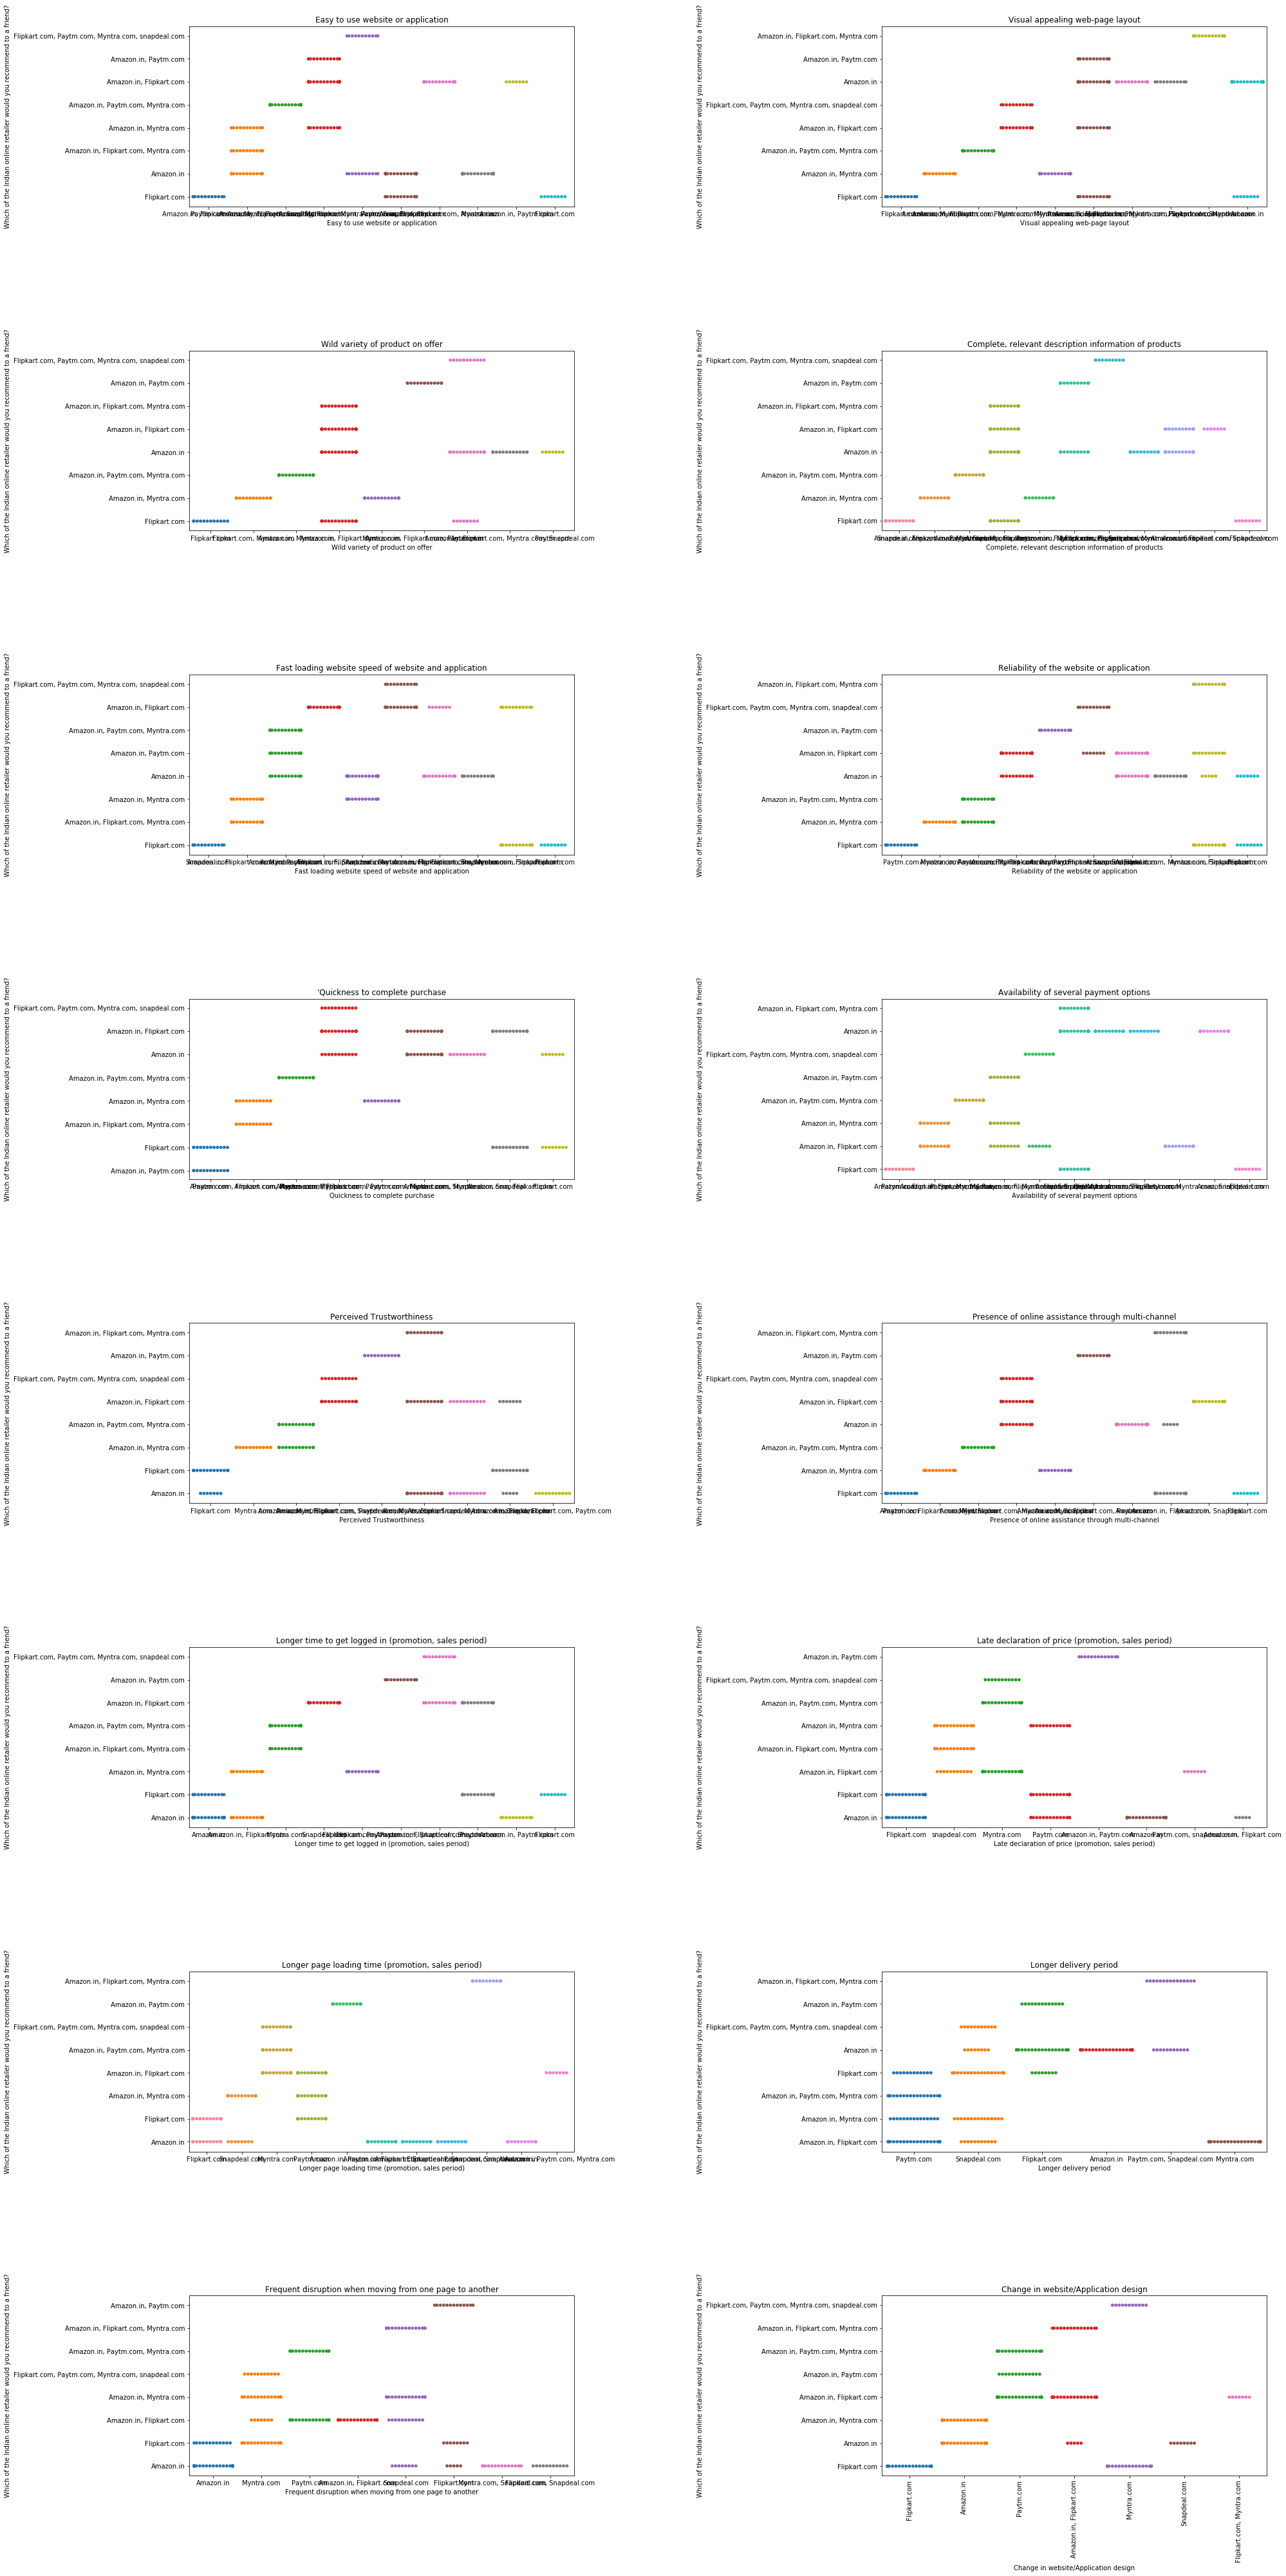

In [82]:
size = (30,70)
CategoricalConData1['Which of the Indian online retailer would you recommend to a friend?']=dfsheet['Which of the Indian online retailer would you recommend to a friend?']

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .8, wspace=.8)
fig=plt.xticks(rotation = '90')

sns.swarmplot(x=CategoricalConData1['Easy to use website or application'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[0][0], ).set_title("Easy to use website or application")
sns.swarmplot(x=CategoricalConData1['Visual appealing web-page layout'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[0][1] ).set_title('Visual appealing web-page layout')

sns.swarmplot(x=CategoricalConData1['Wild variety of product on offer'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[1][0], ).set_title("Wild variety of product on offer")
sns.swarmplot(x=CategoricalConData1['Complete, relevant description information of products'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[1][1] ).set_title("Complete, relevant description information of products")

sns.swarmplot(x=CategoricalConData1['Fast loading website speed of website and application'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[2][0], ).set_title("Fast loading website speed of website and application")
sns.swarmplot(x=CategoricalConData1['Reliability of the website or application'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[2][1] ).set_title("Reliability of the website or application")

sns.swarmplot(x=CategoricalConData1['Quickness to complete purchase'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[3][0], ).set_title("'Quickness to complete purchase")
sns.swarmplot(x=CategoricalConData1['Availability of several payment options'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[3][1] ).set_title("Availability of several payment options")

sns.swarmplot(x=CategoricalConData1['Perceived Trustworthiness'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[4][0], ).set_title("Perceived Trustworthiness")
sns.swarmplot(x=CategoricalConData1['Presence of online assistance through multi-channel'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[4][1] ).set_title("Presence of online assistance through multi-channel")

sns.swarmplot(x=CategoricalConData1['Longer time to get logged in (promotion, sales period)'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[5][0], ).set_title("Longer time to get logged in (promotion, sales period)")
sns.swarmplot(x=CategoricalConData1['Late declaration of price (promotion, sales period)'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[5][1] ).set_title("Late declaration of price (promotion, sales period)")

sns.swarmplot(x=CategoricalConData1['Longer page loading time (promotion, sales period)'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[6][0], ).set_title("Longer page loading time (promotion, sales period)")
sns.swarmplot(x=CategoricalConData1['Longer delivery period'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[6][1] ).set_title("Longer delivery period")

sns.swarmplot(x=CategoricalConData1['Frequent disruption when moving from one page to another'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[7][0], ).set_title("Frequent disruption when moving from one page to another")
sns.swarmplot(x=CategoricalConData1['Change in website/Application design'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'],ax=axs[7][1] ).set_title("Change in website/Application design")



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

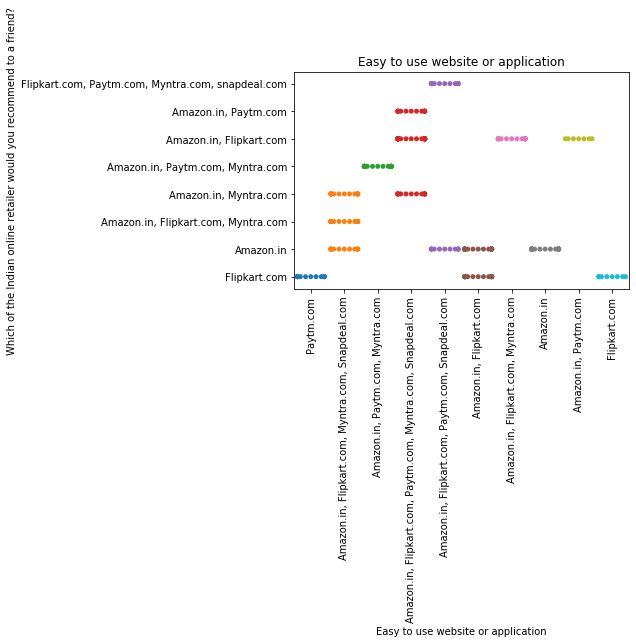

In [78]:
sns.swarmplot(x=CategoricalConData1['Easy to use website or application'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title("Easy to use website or application")
plt.xticks(rotation = '90')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

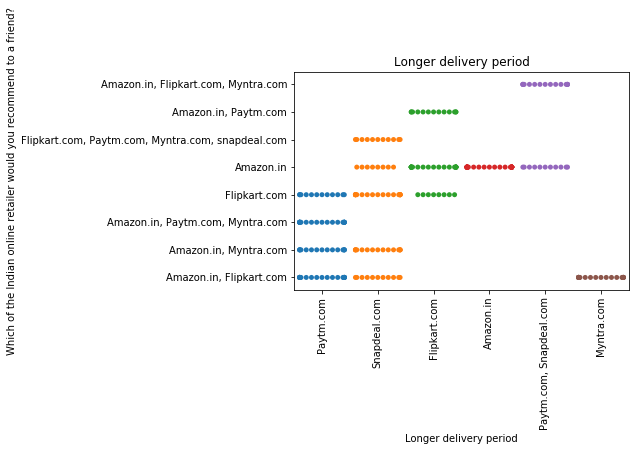

In [84]:
sns.swarmplot(x=CategoricalConData1['Longer delivery period'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title("Longer delivery period")
plt.xticks(rotation = '90')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

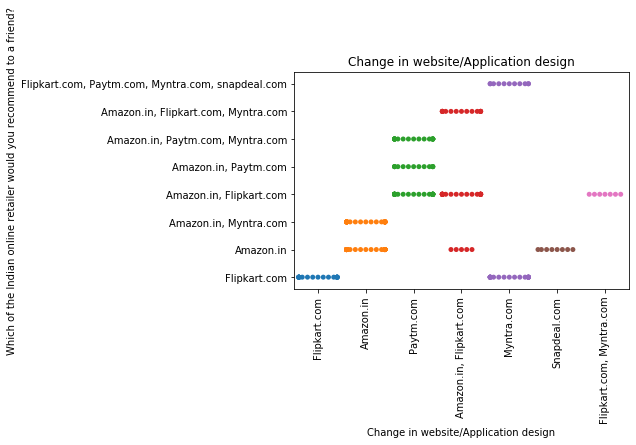

In [86]:
sns.swarmplot(x=CategoricalConData1['Change in website/Application design'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title("Change in website/Application design")
plt.xticks(rotation = '90')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

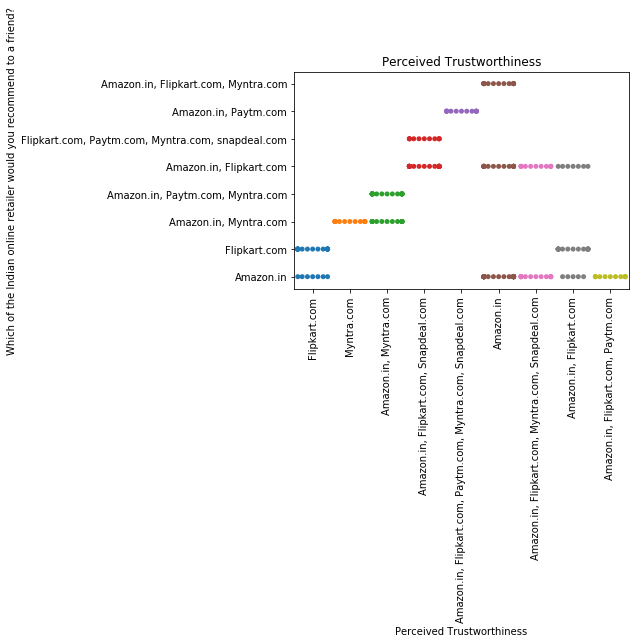

In [87]:
sns.swarmplot(x=CategoricalConData1['Perceived Trustworthiness'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title("Perceived Trustworthiness")
plt.xticks(rotation = '90')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

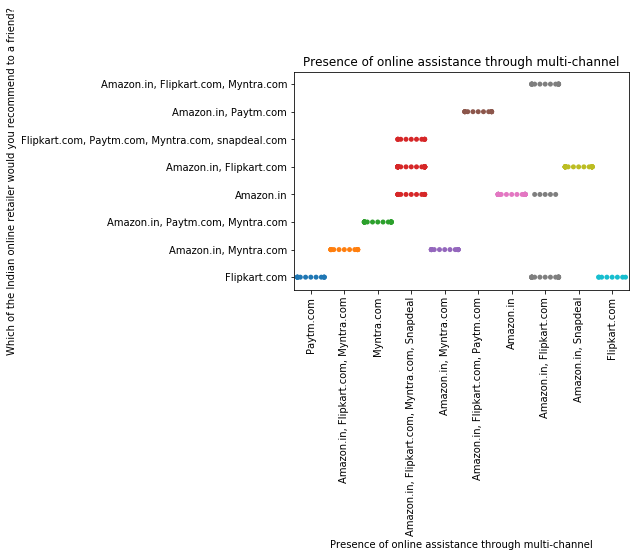

In [88]:
sns.swarmplot(x=CategoricalConData1['Presence of online assistance through multi-channel'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title("Presence of online assistance through multi-channel")
plt.xticks(rotation = '90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

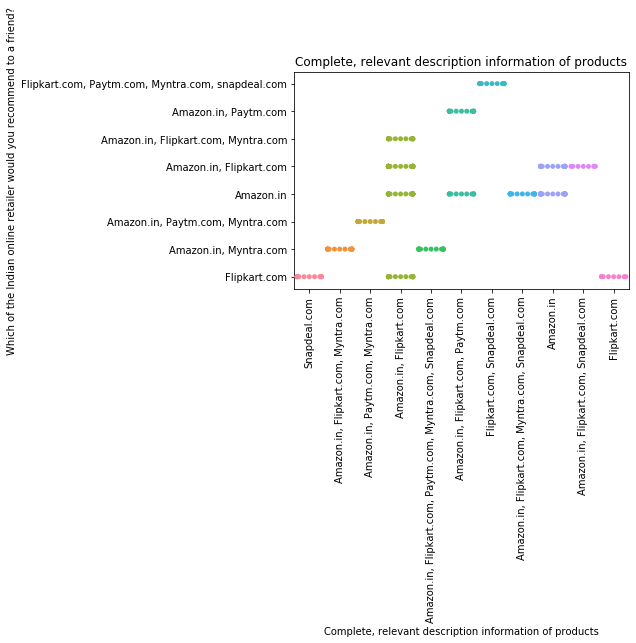

In [89]:
sns.swarmplot(x=CategoricalConData1['Complete, relevant description information of products'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title("Complete, relevant description information of products")
plt.xticks(rotation = '90')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

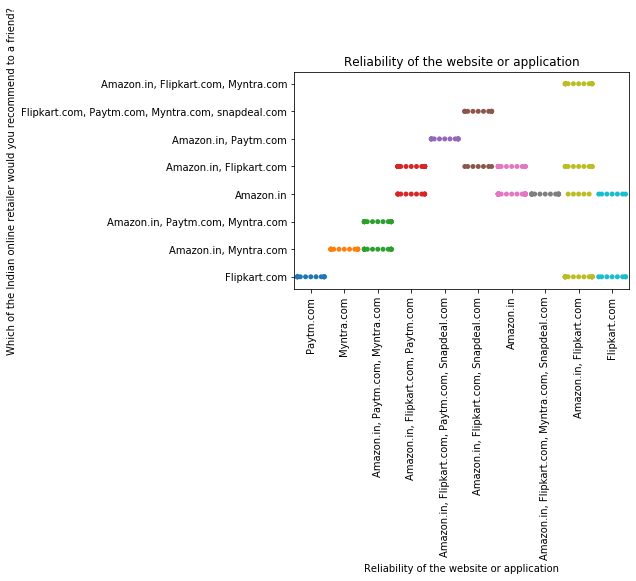

In [90]:
sns.swarmplot(x=CategoricalConData1['Reliability of the website or application'],y=CategoricalConData['Which of the Indian online retailer would you recommend to a friend?'] ).set_title('Reliability of the website or application')
plt.xticks(rotation = '90')

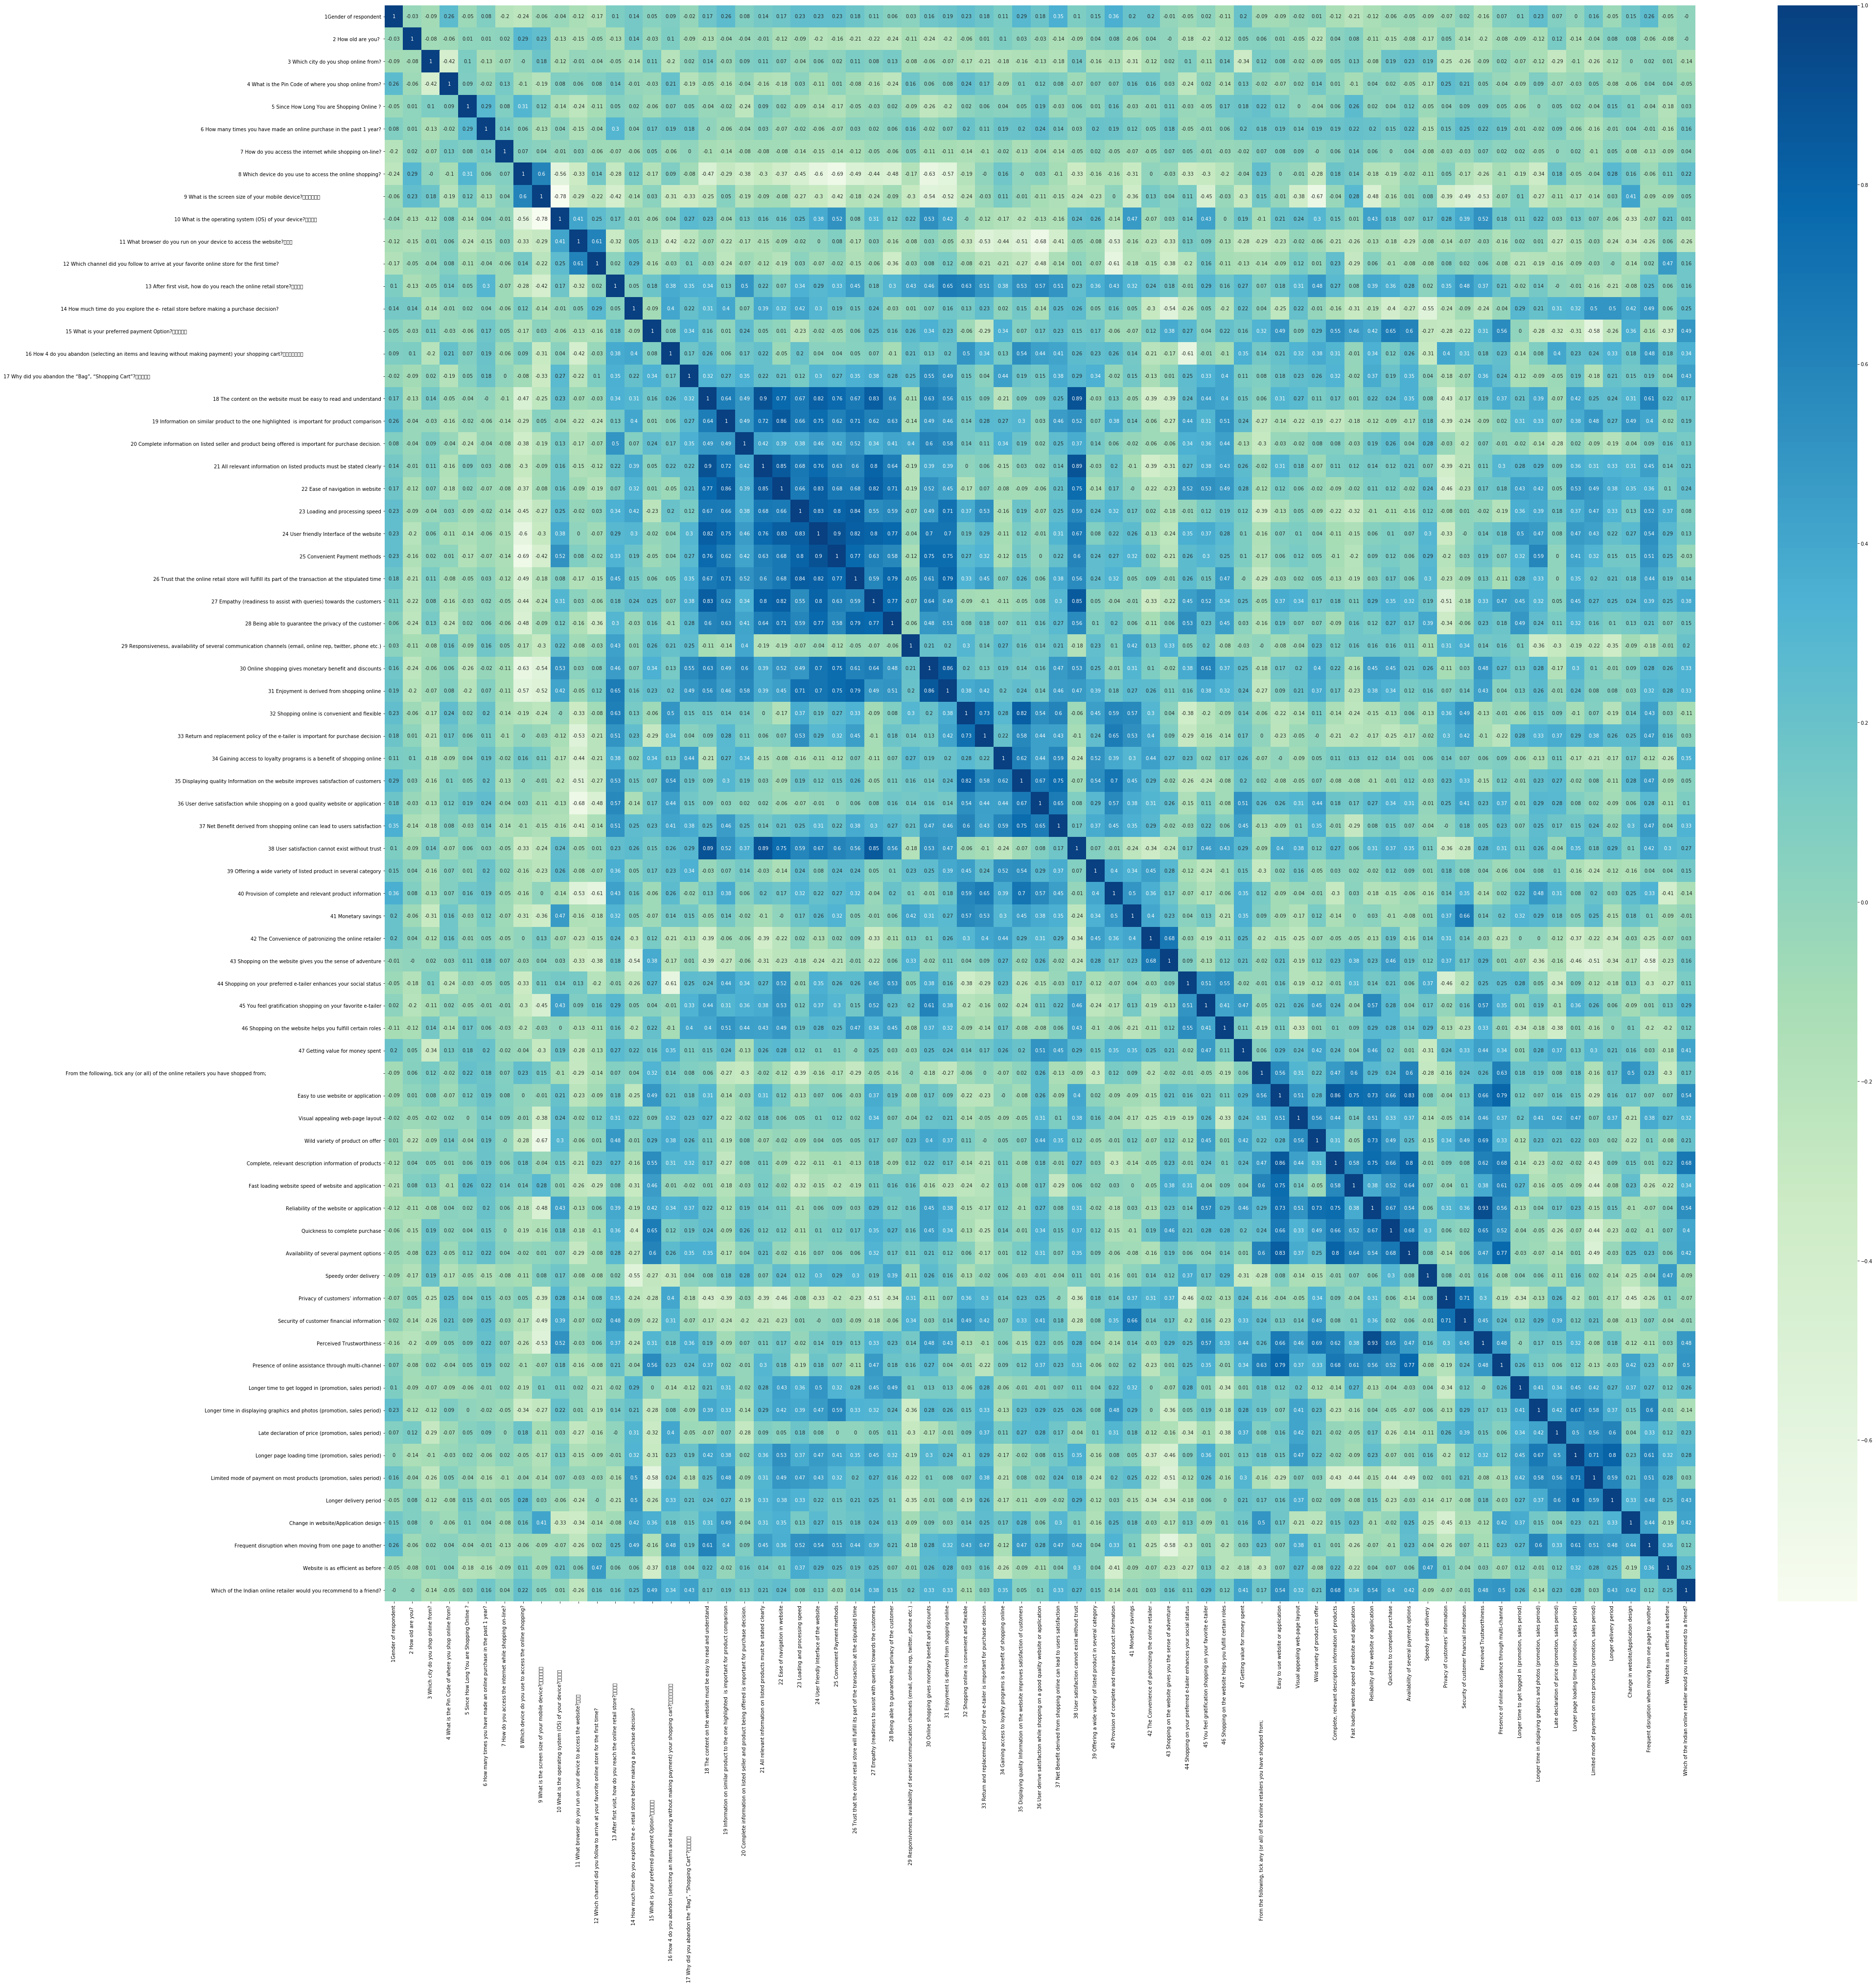

In [18]:
plt.figure(figsize=(60,60))
sns.heatmap(round(dfcoded.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

In [ ]:
#Multicollinearity is also present 18 to 28 columns 
#18 and 21 column shows Multicollinearity

In [149]:
dfcoded.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                     0.063243
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  1.748322
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.554705
6 How many times you have made an online purchase in the past 1 year?                                   

In [197]:
#Lets treat the skewness
import numpy as np
for index in dfcoded.skew().index:
    if dfcoded.skew().loc[index]>0.5:
        dfcoded[index]=np.cbrt(dfcoded[index])
    if dfcoded.skew().loc[index]<-0.5:
        dfcoded[index]=np.cbrt(dfcoded[index])

In [ ]:
#Now Lets drop useless collumns and that shows multicollinearity
#i.e Pincode

### Chi square test for feature selection

In [238]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=30)
x_kbest = chi2_selector.fit_transform(x, y)
# Show results
print('Original number of features:', x.shape[1])
print('Reduced number of features:', x_kbest.shape[1])

Original number of features: 69
Reduced number of features: 30


In [248]:
x_kbest

array([[ 2.,  1.,  1., ...,  2.,  0.,  0.],
       [ 2.,  3.,  4., ...,  0.,  4.,  1.],
       [ 4.,  2.,  4., ...,  5.,  6.,  0.],
       ...,
       [ 0.,  1.,  1., ...,  6.,  7.,  0.],
       [10.,  2.,  3., ...,  0.,  5.,  5.],
       [ 3.,  2.,  4., ...,  0.,  0.,  0.]])

In [239]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency



class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None

In [245]:
   def _print_chisquare_result(self, x, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(x)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(x)

        print(result)   

In [244]:
 def TestIndependence(self,x,y, alpha=0.05):
        #X = self.df[colX].astype(str)
        #Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(x,alpha)

In [254]:
dfsheet

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

# ML for Classification

In [199]:
df=dfcoded.copy()

In [259]:
df=dfsheet.copy()

In [261]:
x=df.drop(['Which of the Indian online retailer would you recommend to a friend?','4 What is the Pin Code of where you shop online from?'],axis=1) 
y=df['Which of the Indian online retailer would you recommend to a friend?']

In [260]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
       df[col]=LabelEncoder().fit_transform(df[col])

In [262]:
x.shape,y.shape

((269, 69), (269,))

In [250]:
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
%matplotlib inline

In [292]:
x

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
4                        0                    0   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
4                                        0   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
4                                             1   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    2                       
1                                                    3                       
2                                                    3                       
3                                                    5                       
4                                                    0                       
..                                                 ...                       
264                                                  5                       
265                                                  2                       
266                                                  5                       
267                                                  5                       
268                                                  2                       

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    3          
2                                                    1          
3                                                    1          
4                                                    3          
..                                                 ...          
264                                                  1          
265                                                  1          
266                                                  2          
267                                                  3          
268                                                  1          

     8 Which device do you use to access the online shopping?  \
0                                                    0          
1                                                    2          
2                                                    2          
3                                                    2          
4                                                    2          
..                                                 ...          
264                                                  

In [291]:
y

0      6
1      3
2      5
3      1
4      3
      ..
264    0
265    6
266    0
267    0
268    0
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 269, dtype: int32

In [206]:
len(selected_feat),selected_feat

(23,
 Index(['2 How old are you? ', '3 Which city do you shop online from?',
        '6 How many times you have made an online purchase in the past 1 year?',
        '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
        '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
        '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
        '43 Shopping on the website gives you the sense of adventure',
        'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
        'Easy to use website or application',
        'Visual appealing web-page layout',
        'Complete, relevant description information of products',
        'Reliability

In [263]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(chi2, k=30)
x_kbest = chi2_selector.fit_transform(x, y)
# Show results
print('Original number of features:', x.shape[1])
print('Reduced number of features:', x_kbest.shape[1])

Original number of features: 69
Reduced number of features: 30


In [264]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_kbest)
newx=sc.transform(x_kbest)

In [265]:
#Lets use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=26)
x_pca=pca.fit_transform(newx)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :1.0


In [209]:
x_pca

array([[ 3.3459394 ,  8.4146183 ,  4.54485881, ...,  0.23648951,
        -0.17004512,  0.43837283],
       [-4.79327465,  0.39707567, -3.52677552, ..., -0.09170604,
         0.28262069, -0.17131831],
       [-3.35150348,  3.8826295 , -2.05845783, ...,  0.07339182,
         0.27376728,  0.39430105],
       ...,
       [ 0.67422239, -4.56662942,  0.89161554, ..., -0.2814101 ,
        -0.52031279,  0.27529935],
       [-1.38441954,  1.15153457,  0.85580451, ...,  0.12901769,
        -0.57115809, -0.225495  ],
       [-1.03418219, -1.45014253,  0.12941321, ..., -0.13167782,
         0.33640444,  0.04259466]])

In [284]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,newx,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20,stratify=y)
        #x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred,multi_class='ovr')
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [285]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    scores=cross_val_score(model,x,y,cv=10,scoring="roc_auc")
    print("Mean roc auc score for classifier: ",scores.mean())
    print("standard deviation in roc auc score for classifier: ",scores.std())
    print(scores)

In [290]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression(C=3.34431505414951,penalty='l2')
max_aucroc_score(lg_clf,x_pca,y)

AxisError: axis 1 is out of bounds for array of dimension 1

In [287]:
from sklearn.svm import SVC

svc1=SVC(kernel="rbf",C=10)
max_aucroc_score(svc1,x_pca,y)

AxisError: axis 1 is out of bounds for array of dimension 1

In [236]:
#Lets choose random forest classifier as our final model and random state 70
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 71,test_size=0.20)
rf_clf=RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred,average='macro'))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred,average='macro',multi_class='ovr'))
print("Accuracy score: ",accuracy_score(y_test,y_pred,average='macro',multi_class='ovr'))


Confusion matrix 
 [[15  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  2]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         2

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



AxisError: axis 1 is out of bounds for array of dimension 1